In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"
!wget $data

--2025-10-12 07:56:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.001s  

2025-10-12 07:56:23 (85.9 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [2]:
df = pd.read_csv("course_lead_scoring.csv")
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
print(df.shape)
print()
print(df.columns)
print()
print(df.dtypes)

(1462, 9)

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object


In [3]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [14]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique()[:5])
    print()

lead_source
5
['paid_ads' 'social_media' 'events' 'referral' 'organic_search']

industry
7
[nan 'retail' 'healthcare' 'education' 'manufacturing']

number_of_courses_viewed
10
[1 5 2 3 0]

annual_income
1267
[79450. 46992. 78796. 83843. 85012.]

employment_status
4
['unemployed' 'employed' nan 'self_employed' 'student']

location
7
['south_america' 'australia' 'europe' 'africa' 'middle_east']

interaction_count
12
[4 1 3 6 2]

lead_score
101
[0.94 0.8  0.69 0.87 0.62]

converted
2
[1 0]



In [4]:
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']

numerical_features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [5]:
df[categorical_features] = df[categorical_features].fillna("NA")
df[numerical_features] = df[numerical_features].fillna(0.0)

In [6]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [6]:
df.industry.mode()[0]

'retail'

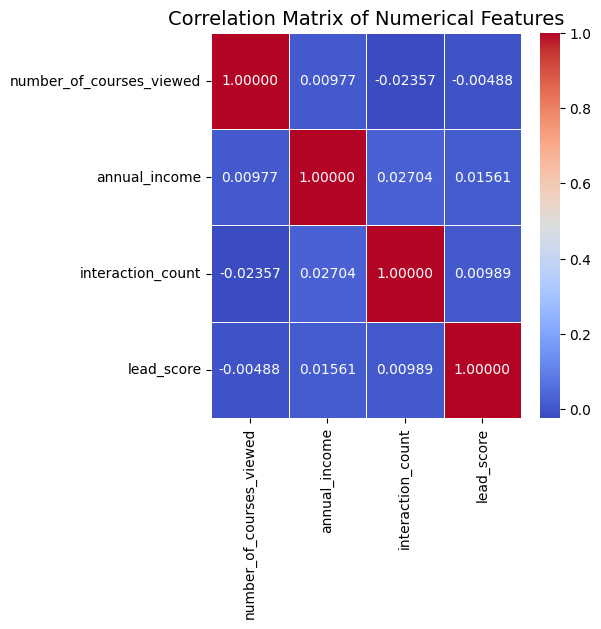

In [40]:
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".5f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()

In [8]:
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state= 42)


In [9]:
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state= 42)


In [10]:
df_train = df_train.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)

In [11]:
len(df_train), len(df_test), len(df_val), len(df)

(876, 293, 293, 1462)

In [12]:
y_train = df_train.converted.values
y_test = df_test.converted.values
y_val = df_val.converted.values

In [13]:
del df_train["converted"]
del df_test["converted"]
del df_val["converted"]

In [14]:
def mutual_info(series):
    return mutual_info_score(series, y_train)

In [15]:
mi = df_train[categorical_features].apply(mutual_info)
mi.sort_values(ascending= False)

lead_source          0.035396
employment_status    0.012938
industry             0.011575
location             0.004464
dtype: float64

In [16]:
train_dict = df_train[categorical_features + numerical_features].to_dict(orient= "records")

In [17]:
dv = DictVectorizer(sparse= False)

In [19]:
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_features + numerical_features].to_dict(orient= "records")
X_val = dv.transform(val_dict)

In [20]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [21]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
y_predict = model.predict_proba(X_val)[:, 1]

convert = (y_predict >= 0.5)

(y_val == convert).mean()

np.float64(0.6996587030716723)

In [23]:
y_pred = model.predict(X_train)
accuracy = (y_train == y_pred).mean().round(2)
print("Accuracy:", accuracy)


Accuracy: 0.74


In [24]:
full_train_dict = df_full_train[categorical_features + numerical_features].to_dict(orient= "records")
dv = DictVectorizer(sparse= False)
X_full_train = dv.fit_transform(full_train_dict)

y_full_train = df_full_train.converted.values

In [25]:
model_2 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_2.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
test_dict = df_test[categorical_features + numerical_features].to_dict(orient= "records")

X_test = dv.transform(test_dict)

y_predictions = model_2.predict_proba(X_test)[:, 1]

decision = (y_predictions >= 0.5)

(decision == y_test).mean()


np.float64(0.7372013651877133)

In [30]:
# 1. Define your base feature list
all_features = categorical_features + numerical_features

# 2. Compute baseline accuracy
train_dict = df_train[all_features].to_dict(orient="records")
X_base_train = dv.fit_transform(train_dict)
y_base_train = y_train

# test_dict = df_test[all_features].to_dict(orient="records")
# X_test = dv.transform(test_dict)
# y_test = y_test

val_dict = df_val[all_features].to_dict(orient="records")
X_val = dv.transform(val_dict)
y_val = y_val

# Train base model
model_base = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_base.fit(X_base_train, y_base_train)

# Baseline accuracy
y_pred_base = model_base.predict_proba(X_val)[:, 1]
decision_base = (y_pred_base >= 0.5)
baseline_accuracy = (decision_base == y_val).mean()

print("Baseline Accuracy:", baseline_accuracy)


Baseline Accuracy: 0.6996587030716723


In [35]:
feature_diff = {}

for feature in categorical_features:
    reduced_features = [f for f in all_features if f != feature]
    
    train_dict = df_train[reduced_features].to_dict(orient="records")
    X_train_reduced = dv.fit_transform(train_dict)
    
    test_dict = df_test[reduced_features].to_dict(orient="records")
    X_test_reduced = dv.transform(test_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_reduced, y_base_train)
    
    y_pred = model.predict_proba(X_test_reduced)[:, 1]
    decision = (y_pred >= 0.5)
    acc = (decision == y_val).mean()
    
    feature_diff[feature] = baseline_accuracy - acc
    print(f"{feature}: {acc:.4f}  (Δ = {feature_diff[feature]:.6f})")

least_useful = min(feature_diff, key=feature_diff.get)
print(f"\nLeast useful categorical feature: {least_useful}")

lead_source: 0.5597  (Δ = 0.139932)
industry: 0.5529  (Δ = 0.146758)
employment_status: 0.5495  (Δ = 0.150171)
location: 0.5495  (Δ = 0.150171)

Least useful categorical feature: lead_source


In [36]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = {}

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    
    # Train on all features (same as Q4)
    model.fit(X_full_train, y_full_train)
    
    # Predict on validation set
    y_pred = model.predict_proba(X_val)[:, 1]
    decision = (y_pred >= 0.5)
    
    acc = (decision == y_val).mean()
    accuracies[C] = round(acc, 3)
    
    print(f"C={C}: Validation Accuracy = {accuracies[C]}")

C=0.01: Validation Accuracy = 0.706
C=0.1: Validation Accuracy = 0.717
C=1: Validation Accuracy = 0.717
C=10: Validation Accuracy = 0.717
C=100: Validation Accuracy = 0.717
